In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import math
import random
import matplotlib.pyplot as plt
import textwrap
%matplotlib inline

In [2]:
# create dataframe from spreadsheet using pandas
culture_df_start = pd.read_csv("culturecheckup.csv", header= 0,
                        encoding= 'unicode_escape', names=['ID','Start time','Completion time','Email','Name','Which team do you contribute to?'
                                                          ,'On my team, information is actively sought'
                                                          ,'On my team, I feel I can deliver bad news or news of a failure without retribution'
                                                          ,'On my team, responsibilities are shared'
                                                          ,'On my team, cross-functional collaboration is encouraged and rewarded'
                                                          ,'On my team, failure leads to learning'
                                                          ,'On my team, new ideas are welcomed'
                                                          ,'Is there any additional information to help frame your submissions above? Examples?'])

culture_df_start

,ID,Start time,Completion time,Email,Name,Which team do you contribute to?,"On my team, information is actively sought","On my team, I feel I can deliver bad news or news of a failure without retribution","On my team, responsibilities are shared","On my team, cross-functional collaboration is encouraged and rewarded","On my team, failure leads to learning","On my team, new ideas are welcomed",Is there any additional information to help frame your submissions above? Examples?
0,1,2/8/21 13:58:28,2/8/21 13:59:03,anonymous,NaN,SAT - Roadmap Rejects,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2/8/21 13:58:34,2/8/21 13:59:33,anonymous,NaN,SAT - The Sims,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2/8/21 13:58:25,2/8/21 13:59:45,anonymous,NaN,Enabling - Konnect,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2/8/21 13:59:15,2/8/21 13:59:59,anonymous,NaN,Platform - Covert DevOps,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2/8/21 13:58:50,2/8/21 14:00:31,anonymous,NaN,Platform - Coral,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,215,5/3/21 11:04:07,5/3/21 16:30:35,anonymous,NaN,SAT - The Survivors,5.0,2.0,2.0,1.0,2.0,1.0,Our retros avoid the elephant in the room. Som...
215,216,5/3/21 16:52:26,5/3/21 16:53:25,anonymous,NaN,SAT - LATTE,5.0,6.0,5.0,6.0,3.0,6.0,NaN
216,217,5/3/21 17:50:01,5/3/21 18:00:00,anonymous,NaN,Enabling - CDP,7.0,7.0,6.0,7.0,7.0,6.0,NaN
217,218,5/4/21 8:34:21,5/4/21 8:35:18,anonymous,NaN,SAT - Parks & Integration,7.0,7.0,7.0,7.0,7.0,7.0,NaN


In [3]:
#drop unused columns for sharing 6 likert responses
del culture_df_start["Email"]
del culture_df_start["Name"]
del culture_df_start["Is there any additional information to help frame your submissions above? Examples?"]
del culture_df_start["ID"]
#del culture_df_start["Start time"]
#del culture_df_start["Completion time"]
#del culture_df_start["Which team do you contribute to?"]

#drop null values to keep only rows with entries for questions
culture_df = culture_df_start.dropna()

In [4]:
#let's see that dataframe!
culture_df

,Start time,Completion time,Which team do you contribute to?,"On my team, information is actively sought","On my team, I feel I can deliver bad news or news of a failure without retribution","On my team, responsibilities are shared","On my team, cross-functional collaboration is encouraged and rewarded","On my team, failure leads to learning","On my team, new ideas are welcomed"
151,5/3/21 10:56:54,5/3/21 10:57:44,SAT - FBI,7.0,7.0,7.0,5.0,7.0,7.0
152,5/3/21 10:56:23,5/3/21 10:58:52,Enabling - CDP,6.0,4.0,6.0,4.0,7.0,6.0
153,5/3/21 10:57:47,5/3/21 10:59:08,Enabling - Performance & Monitoring,6.0,7.0,4.0,4.0,6.0,7.0
154,5/3/21 10:58:45,5/3/21 10:59:37,SAT - The Pharside,7.0,7.0,7.0,7.0,7.0,7.0
155,5/3/21 10:56:53,5/3/21 11:00:31,SAT - Deja Vu,7.0,7.0,7.0,7.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...
214,5/3/21 11:04:07,5/3/21 16:30:35,SAT - The Survivors,5.0,2.0,2.0,1.0,2.0,1.0
215,5/3/21 16:52:26,5/3/21 16:53:25,SAT - LATTE,5.0,6.0,5.0,6.0,3.0,6.0
216,5/3/21 17:50:01,5/3/21 18:00:00,Enabling - CDP,7.0,7.0,6.0,7.0,7.0,6.0
217,5/4/21 8:34:21,5/4/21 8:35:18,SAT - Parks & Integration,7.0,7.0,7.0,7.0,7.0,7.0


In [5]:
#transpose that df!
culture_dfT = culture_df.T
culture_dfT

,151,152,153,154,155,156,157,158,159,160,...,209,210,211,212,213,214,215,216,217,218
Start time,5/3/21 10:56:54,5/3/21 10:56:23,5/3/21 10:57:47,5/3/21 10:58:45,5/3/21 10:56:53,5/3/21 10:58:37,5/3/21 10:59:13,5/3/21 11:01:35,5/3/21 11:01:25,5/3/21 10:56:37,...,5/3/21 15:30:32,5/3/21 14:59:34,5/3/21 16:02:57,5/3/21 16:06:07,5/3/21 16:09:56,5/3/21 11:04:07,5/3/21 16:52:26,5/3/21 17:50:01,5/4/21 8:34:21,5/4/21 8:49:57
Completion time,5/3/21 10:57:44,5/3/21 10:58:52,5/3/21 10:59:08,5/3/21 10:59:37,5/3/21 11:00:31,5/3/21 11:01:20,5/3/21 11:02:13,5/3/21 11:03:14,5/3/21 11:04:12,5/3/21 11:04:28,...,5/3/21 15:32:23,5/3/21 15:55:19,5/3/21 16:05:55,5/3/21 16:07:16,5/3/21 16:12:30,5/3/21 16:30:35,5/3/21 16:53:25,5/3/21 18:00:00,5/4/21 8:35:18,5/4/21 8:51:34
Which team do you contribute to?,SAT - FBI,Enabling - CDP,Enabling - Performance & Monitoring,SAT - The Pharside,SAT - Deja Vu,SAT - The Pharside,SAT - Stillwater,Enabling - Architecture,SAT - The Sims,Platform - Scrum Bags,...,SAT - Deja Vu,SAT - Parks & Integration,Enabling - Performance & Monitoring,SAT - LATTE,SAT - Deja Vu,SAT - The Survivors,SAT - LATTE,Enabling - CDP,SAT - Parks & Integration,SAT - Stillwater
"On my team, information is actively sought",7,6,6,7,7,1,6,5,6,6,...,6,7,4,7,7,5,5,7,7,5
"On my team, I feel I can deliver bad news or news of a failure without retribution",7,4,7,7,7,1,6,7,5,6,...,7,7,2,6,6,2,6,7,7,6
"On my team, responsibilities are shared",7,6,4,7,7,1,6,5,6,7,...,5,7,3,2,6,2,5,6,7,4
"On my team, cross-functional collaboration is encouraged and rewarded",5,4,4,7,7,1,4,6,7,7,...,7,7,3,3,6,1,6,7,7,4
"On my team, failure leads to learning",7,7,6,7,7,1,4,4,7,6,...,4,7,1,7,4,2,3,7,7,4
"On my team, new ideas are welcomed",7,6,7,7,7,1,6,6,5,7,...,6,7,3,7,7,1,6,6,7,5


In [9]:
#subset each question into their own dataframe
culture_df_1 = culture_df.iloc[:, 0]
culture_df_2 = culture_df.iloc[:, 1]
culture_df_3 = culture_df.iloc[:, 2]
culture_df_4 = culture_df.iloc[:, 3]
culture_df_5 = culture_df.iloc[:, 4]
culture_df_6 = culture_df.iloc[:, 5]



C:\Users\feldmanja\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\feldmanja\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\feldmanja\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

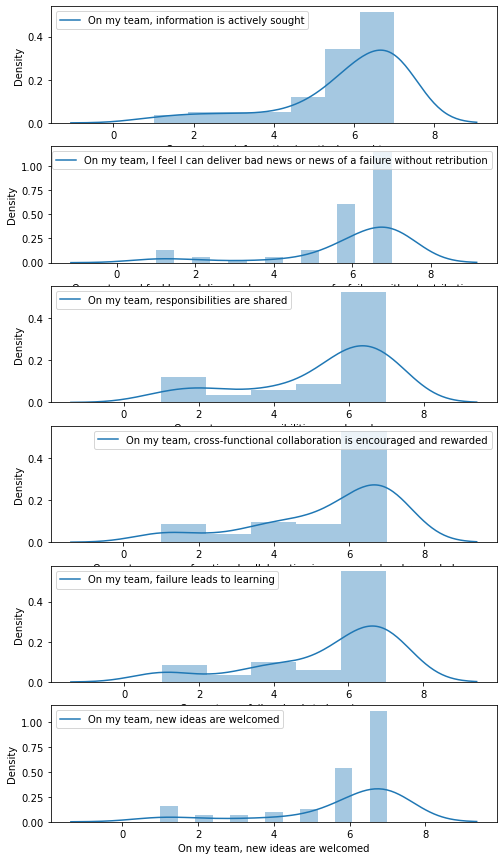

In [10]:
#plot histograms for each question, need to find a way NOT to hard code legend and title
plt.figure(figsize=[8,15])

plt.subplot(6,1,1)
sns.distplot(culture_df_1)
plt.legend(['On my team, information is actively sought'])

plt.subplot(6,1,2)
sns.distplot(culture_df_2)
plt.legend(['On my team, I feel I can deliver bad news or news of a failure without retribution'])

plt.subplot(6,1,3)
sns.distplot(culture_df_3)
plt.legend(['On my team, responsibilities are shared'])

plt.subplot(6,1,4)
sns.distplot(culture_df_4)
plt.legend(['On my team, cross-functional collaboration is encouraged and rewarded'])

plt.subplot(6,1,5)
sns.distplot(culture_df_5)
plt.legend(['On my team, failure leads to learning'])

plt.subplot(6,1,6)
sns.distplot(culture_df_6)
plt.legend(['On my team, new ideas are welcomed'])

C:\Users\feldmanja\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


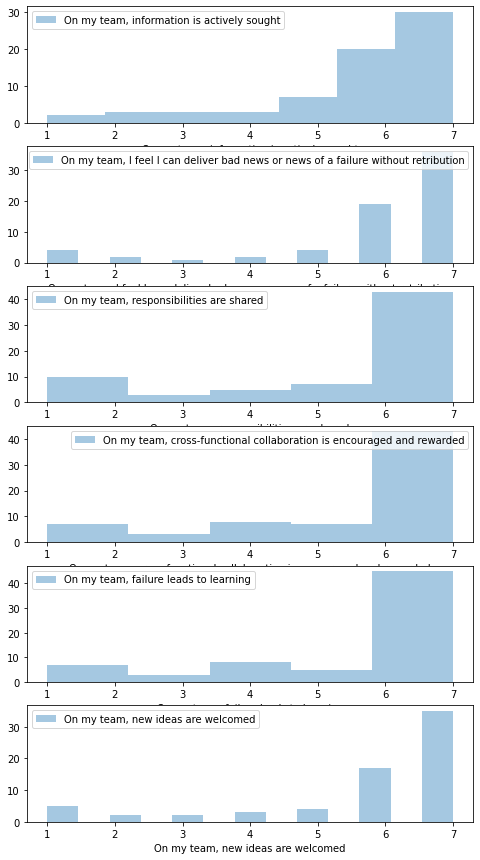

In [11]:
#plot histograms for each question, need to find a way NOT to hard code legend and title
plt.figure(figsize=[8,15])

plt.subplot(6,1,1)
sns.distplot(culture_df_1,kde=False)
plt.legend(['On my team, information is actively sought'])

plt.subplot(6,1,2)
sns.distplot(culture_df_2,kde=False)
plt.legend(['On my team, I feel I can deliver bad news or news of a failure without retribution'])

plt.subplot(6,1,3)
sns.distplot(culture_df_3,kde=False)
plt.legend(['On my team, responsibilities are shared'])

plt.subplot(6,1,4)
sns.distplot(culture_df_4,kde=False)
plt.legend(['On my team, cross-functional collaboration is encouraged and rewarded'])

plt.subplot(6,1,5)
sns.distplot(culture_df_5,kde=False)
plt.legend(['On my team, failure leads to learning'])

plt.subplot(6,1,6)
sns.distplot(culture_df_6,kde=False)
plt.legend(['On my team, new ideas are welcomed'])

In [12]:
#create a new dataframe that will show the correlation between each question
culture_df_corr = pd.DataFrame(np.corrcoef(culture_df.T))

#name the columns
culture_df_corr.columns = ['On my team, information is actively sought'
                           ,'On my team, I feel I can deliver bad news or news of a failure without retribution'
                           ,'On my team, responsibilities are shared'
                           ,'On my team, cross-functional collaboration is encouraged and rewarded'
                           ,'On my team, failure leads to learning'
                           ,'On my team, new ideas are welcomed']

#name the indices
culture_df_corr.index = ['On my team, information is actively sought'
                           ,'On my team, I feel I can deliver bad news or news of a failure without retribution'
                           ,'On my team, responsibilities are shared'
                           ,'On my team, cross-functional collaboration is encouraged and rewarded'
                           ,'On my team, failure leads to learning'
                           ,'On my team, new ideas are welcomed']

culture_df_corr

,"On my team, information is actively sought","On my team, I feel I can deliver bad news or news of a failure without retribution","On my team, responsibilities are shared","On my team, cross-functional collaboration is encouraged and rewarded","On my team, failure leads to learning","On my team, new ideas are welcomed"
"On my team, information is actively sought",1.000000,0.691883,0.811210,0.635854,0.769456,0.829690
"On my team, I feel I can deliver bad news or news of a failure without retribution",0.691883,1.000000,0.629611,0.763203,0.736284,0.708216
"On my team, responsibilities are shared",0.811210,0.629611,1.000000,0.811681,0.750320,0.780190
"On my team, cross-functional collaboration is encouraged and rewarded",0.635854,0.763203,0.811681,1.000000,0.691497,0.746311
"On my team, failure leads to learning",0.769456,0.736284,0.750320,0.691497,1.000000,0.764803
"On my team, new ideas are welcomed",0.829690,0.708216,0.780190,0.746311,0.764803,1.000000


<AxesSubplot:>

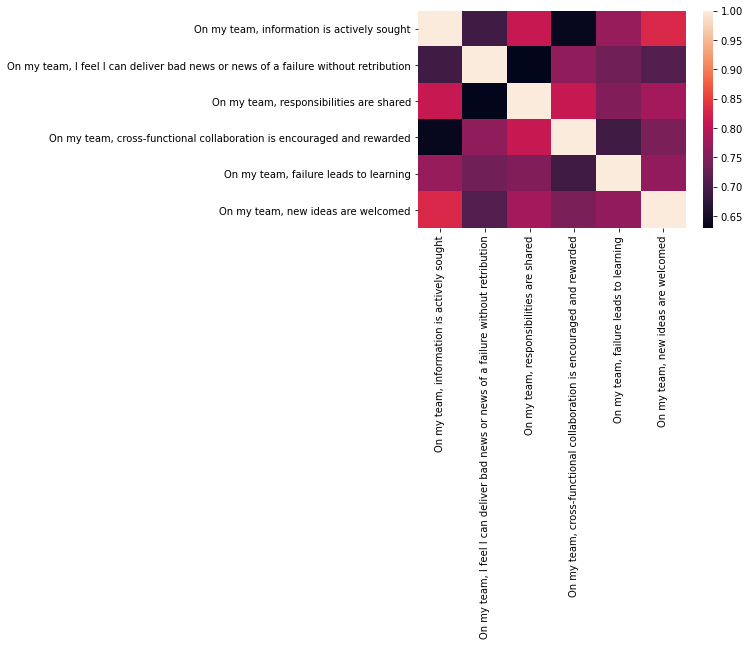

In [158]:
#create a heatmap that will show the correlation between each question
sns.heatmap(np.corrcoef(culture_df.T),
           yticklabels = culture_df_corr.columns,
           xticklabels = culture_df_corr.index)

In [13]:
#https://blog.orikami.nl/behind-the-screens-likert-scale-visualization-368557ad72d1

likert_colors = ['white', 'firebrick','lightcoral','gainsboro','cornflowerblue', 'darkblue']

In [14]:
wrapper = textwrap.TextWrapper(width=50)
culture_df_q['question'] = culture_df['question'].apply(lambda x: wrapper.fill(x))

KeyError: 'question'

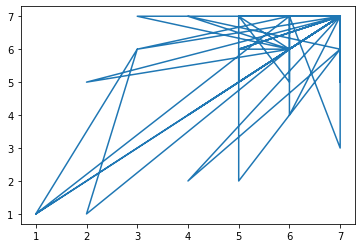

In [60]:
# Some questions are rather long. To nicely display them in the figure they need to be wrapped.
wrapper = textwrap.TextWrapper(width=50)
culture_df['question'] = df['question'].apply(lambda x: wrapper.fill(x))

# define likert colors, since the default colors look terrible.
# Note that the first color is assigned to the 'invisible' column and is therefore white
likert_colors = ['white', 'firebrick','lightcoral','gainsboro','cornflowerblue', 'darkblue']

# set the questions as the index for easier plotting later on
# (alternatively one could explicitly state in the plotting call which column to use for labeling)
df = df.set_index('question')

# find out the middle value
# Note that this code is non-generic, and depends on the particular anchor points for the scale
middles = df[["strongly disagree", "disagree"]].sum(axis=1) + df["neutral"]*.5

# define some margin (1.1) for the left hand side of the plot
longest = middles.max()*1.1

# insert the invisible column
df.insert(0, '', (middles - longest).abs())

# create the horizontal bar chart, using the subset 'all'
ax = df[df['subtable']=='all'].dropna(axis=1).plot.barh(
    stacked=True, 
    color=likert_colors, 
    edgecolor='none'
)

# plot a vertical dashed line at 0
z = plt.axvline(longest, linestyle='--', color='black', alpha=.5)
# put this line at the background
z.set_zorder(-1)

# define some margin (1.05) for the right hand side of the plot
complete_longest = int(df.sum(axis=1).max()*1.05) 
plt.xlim(0, complete_longest)

# create custom tick positions and labels
# the value of 4000 is particularly chosen for this case
xvalues = [longest-4000+4000*i for i in range(4)]
xlabels = ['{:4.0f}'.format(x-longest) for x in xvalues]
plt.xticks(xvalues, xlabels)

# Shrink current axis's height by 10% on the bottom to make room for the legend
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.8])

# create the legend
handler, label = ax.get_legend_handles_labels()
ax.legend(
    handler, 
    label, 
    loc='upper center', 
    bbox_to_anchor=(.5, -0.2), 
    ncol=5, 
    edgecolor='white'
)

# set labels and title
plt.xlabel('Count')
plt.ylabel('')
plt.title('Machiavellianism')
plt.show()